In [2]:
import os
import sys
sys.path.append("/n/home12/binxuwang/Github/DiffusionObjectRelation/PixArt-alpha")
from diffusion.model.t5 import T5Embedder
from os.path import join
import torch as th
import numpy as np

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Pleas

In [3]:
pretrained_models_dir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/pretrained_models"
t5_embedder = T5Embedder(device="cuda", local_cache=True, cache_dir=f'{pretrained_models_dir}/t5_ckpts', model_max_length=20)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/pretrained_models/t5_ckpts/t5-v1_1-xxl


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import os
import hashlib
dataset_root1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot2"
dataset_root2 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_rndembposemb"

subfolder = "img_vae_features_128resolution/noflip" #"images"
for subfolder in ["images",
                  "captions",
                  "img_vae_features_128resolution/noflip",
                  "partition",
                  "caption_feature_wmask"]:
    print(f"\nChecking {subfolder}...")
    # List files in images subfolder for both datasets
    files1 = sorted(os.listdir(join(dataset_root1, subfolder)))
    files2 = sorted(os.listdir(join(dataset_root2, subfolder)))

    # Sort the lists to ensure consistent ordering
    files1.sort()
    files2.sort()
    # Assert that the first few files are the same
    assert files1[:10] == files2[:10], "First 10 files in  subfolder are not the same"
    print("First 10 files in both datasets are identical:")
    print(files1[:10])
    # Check if the content of corresponding image files matches using hash comparison
    print("\nChecking content of first 5  files...")
    for i in range(min(5, len(files1), len(files2))):
        file1_path = join(dataset_root1, subfolder, files1[i])
        file2_path = join(dataset_root2, subfolder, files2[i])
        
        # Read files in binary mode and compute hashes
        with open(file1_path, 'rb') as f1:
            hash1 = hashlib.md5(f1.read()).hexdigest()
        
        with open(file2_path, 'rb') as f2:
            hash2 = hashlib.md5(f2.read()).hexdigest()
        
        if hash1 == hash2:
            print(f"✓ {files1[i]}:  content matches (hash: {hash1[:8]}...)")
        else:
            print(f"✗ {files1[i]}:  content differs")
            print(f"  Dataset1 hash: {hash1}")
            print(f"  Dataset2 hash: {hash2}")



Checking images...
First 10 files in both datasets are identical:
['0.png', '1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png']

Checking content of first 5  files...
✓ 0.png:  content matches (hash: 3083128f...)
✓ 1.png:  content matches (hash: 003b9ece...)
✓ 10.png:  content matches (hash: f9e1efdb...)
✓ 100.png:  content matches (hash: 3e255d52...)
✓ 1000.png:  content matches (hash: 57109c7f...)

Checking captions...
First 10 files in both datasets are identical:
['0.txt', '1.txt', '10.txt', '100.txt', '1000.txt', '1001.txt', '1002.txt', '1003.txt', '1004.txt', '1005.txt']

Checking content of first 5  files...
✓ 0.txt:  content matches (hash: a1a35875...)
✓ 1.txt:  content matches (hash: 41fef664...)
✓ 10.txt:  content matches (hash: 7dbc8465...)
✓ 100.txt:  content matches (hash: 600791fe...)
✓ 1000.txt:  content matches (hash: 03993e85...)

Checking img_vae_features_128resolution/noflip...
First 10 files in both datasets are ide

In [ ]:
import os
import hashlib
dataset_root1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot2"
dataset_root2 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_rndemb"

subfolder = "img_vae_features_128resolution/noflip" #"images"
for subfolder in ["images",
                  "captions",
                  "img_vae_features_128resolution/noflip",
                  "partition",
                  "caption_feature_wmask"]:
    print(f"\nChecking {subfolder}...")
    # List files in images subfolder for both datasets
    files1 = sorted(os.listdir(join(dataset_root1, subfolder)))
    files2 = sorted(os.listdir(join(dataset_root2, subfolder)))

    # Sort the lists to ensure consistent ordering
    files1.sort()
    files2.sort()
    # Assert that the first few files are the same
    assert files1[:10] == files2[:10], "First 10 files in  subfolder are not the same"
    print("First 10 files in both datasets are identical:")
    print(files1[:10])
    # Check if the content of corresponding image files matches using hash comparison
    print("\nChecking content of first 5  files...")
    for i in range(min(5, len(files1), len(files2))):
        file1_path = join(dataset_root1, subfolder, files1[i])
        file2_path = join(dataset_root2, subfolder, files2[i])
        
        # Read files in binary mode and compute hashes
        with open(file1_path, 'rb') as f1:
            hash1 = hashlib.md5(f1.read()).hexdigest()
        
        with open(file2_path, 'rb') as f2:
            hash2 = hashlib.md5(f2.read()).hexdigest()
        
        if hash1 == hash2:
            print(f"✓ {files1[i]}:  content matches (hash: {hash1[:8]}...)")
        else:
            print(f"✗ {files1[i]}:  content differs")
            print(f"  Dataset1 hash: {hash1}")
            print(f"  Dataset2 hash: {hash2}")



Checking images...
First 10 files in both datasets are identical:
['0.png', '1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png']

Checking content of first 5  files...
✓ 0.png:  content matches (hash: 3083128f...)
✓ 1.png:  content matches (hash: 003b9ece...)
✓ 10.png:  content matches (hash: f9e1efdb...)
✓ 100.png:  content matches (hash: 3e255d52...)
✓ 1000.png:  content matches (hash: 57109c7f...)

Checking captions...
First 10 files in both datasets are identical:
['0.txt', '1.txt', '10.txt', '100.txt', '1000.txt', '1001.txt', '1002.txt', '1003.txt', '1004.txt', '1005.txt']

Checking content of first 5  files...
✓ 0.txt:  content matches (hash: a1a35875...)
✓ 1.txt:  content matches (hash: 41fef664...)
✓ 10.txt:  content matches (hash: 7dbc8465...)
✓ 100.txt:  content matches (hash: 600791fe...)
✓ 1000.txt:  content matches (hash: 03993e85...)

Checking img_vae_features_128resolution/noflip...
First 10 files in both datasets are ide

In [ ]:
dataset_root1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_T5"
with open(join(dataset_root1, "captions", "100.txt"), 'r') as f:
    text = f.read()
data = np.load(join(dataset_root1, "caption_feature_wmask", "100.npz"))


In [ ]:
data["caption_feature"]
data["attention_mask"]

array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
caption_emb3, emb_mask3 = t5_embedder.get_text_embeddings([text.strip()])
assert caption_emb3.shape == (1, 20, 4096)
assert emb_mask3.shape == (1, 20)
assert np.allclose(caption_emb3.float().cpu().data.numpy(), data["caption_feature"])
assert np.allclose(emb_mask3.cpu().data.numpy(), data["attention_mask"])

### Singel object

In [13]:
dataset_root1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRelSingle_pilot1/"
with open(join(dataset_root1, "captions", "1002.txt"), 'r') as f:
    text = f.read()
    print(text)
data = np.load(join(dataset_root1, "caption_feature_wmask", "1002.npz"))
data["caption_feature"]
data["attention_mask"]
caption_emb3, emb_mask3 = t5_embedder.get_text_embeddings([text.strip()])
assert caption_emb3.shape == (1, 20, 4096)
assert emb_mask3.shape == (1, 20)
assert np.allclose(emb_mask3.cpu().data.numpy(), data["attention_mask"])
assert np.allclose(caption_emb3.float().cpu().data.numpy(), data["caption_feature"])

a blue square


Image size: (128, 128)
(8, 16, 16)


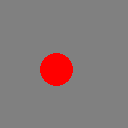

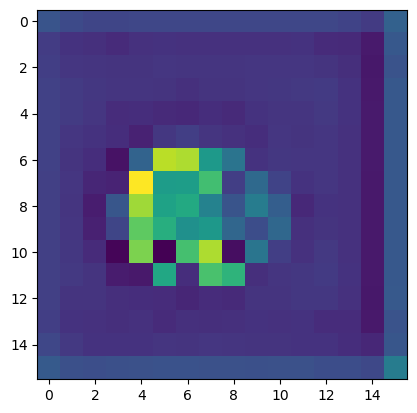

In [22]:
from PIL import Image
dataset_root1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRelSingle_pilot1/"
# Load image
img = Image.open(join(dataset_root1, "images", "1010.png"))
print(f"Image size: {img.size}")

# # Load text embeddings
with open(join(dataset_root1, "img_vae_features_128resolution/noflip/1010.npy"), 'rb') as f:
    data = np.load(f)
    print(data.shape)

display(img)
import matplotlib.pyplot as plt
plt.imshow(data[1, :, :])
plt.show()

In [ ]:
from diffusers import AutoencoderKL
vae = AutoencoderKL.from_pretrained('/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/pretrained_models/sd-vae-ft-ema')
vae = vae.to("cuda")
vae.eval()

An error occurred while trying to fetch /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/pretrained_models/sd-vae-ft-ema: Error no file named diffusion_pytorch_model.safetensors found in directory /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/pretrained_models/sd-vae-ft-ema.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


AutoencoderKL(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsamplers): ModuleList(
          (0): Downsample2D(
            (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
          )
        )
      )
      (1): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0): ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (c

Original image size: (128, 128)
VAE features shape: (8, 16, 16)


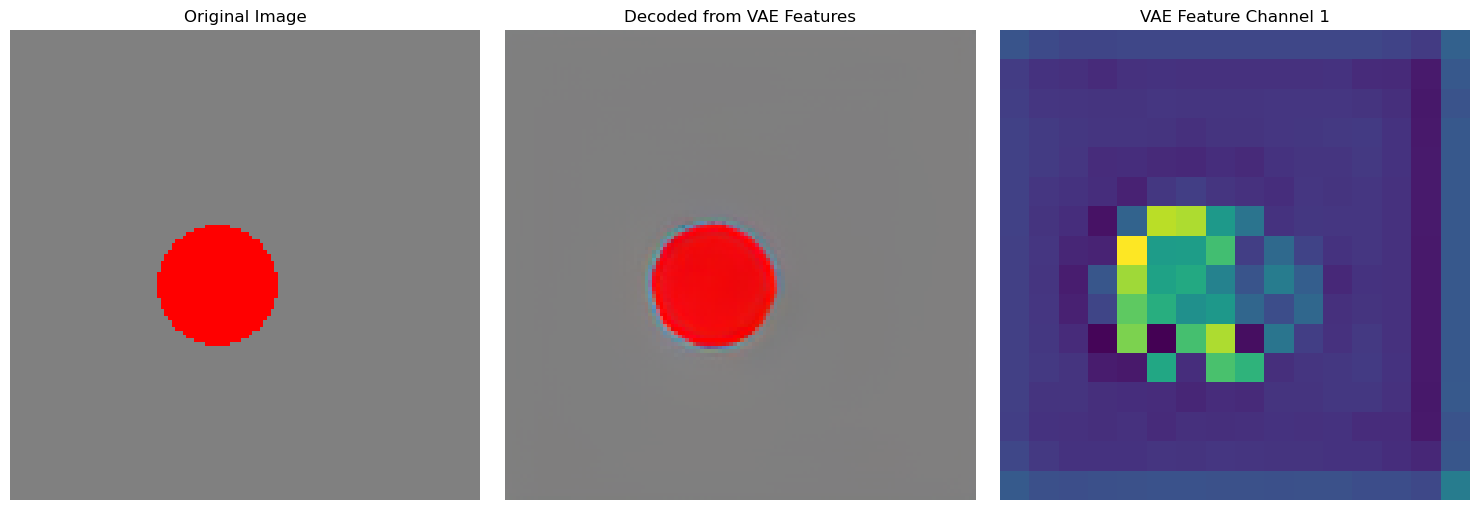

In [ ]:
from PIL import Image
import torch

dataset_root1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRelSingle_pilot1/"

# Load SD VAE decoder


# Load original image for comparison
img = Image.open(join(dataset_root1, "images", "1010.png"))
print(f"Original image size: {img.size}")

# Load VAE features
with open(join(dataset_root1, "img_vae_features_128resolution/noflip/1010.npy"), 'rb') as f:
    vae_features = np.load(f)
    print(f"VAE features shape: {vae_features.shape}")

# Decode the VAE features
vae_tensor = torch.from_numpy(vae_features).to("cuda")
with torch.no_grad():
    decoded_img = vae.decode(vae_tensor[:4].unsqueeze(0)).sample

# Convert to PIL Image
decoded_img = (decoded_img / 2 + 0.5).clamp(0, 1)
decoded_img = decoded_img.cpu().permute(0, 2, 3, 1).numpy()[0]
decoded_img = (decoded_img * 255).astype(np.uint8)
decoded_pil = Image.fromarray(decoded_img)

# Display both images
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img)
ax1.set_title("Original Image")
ax1.axis('off')
ax2.imshow(decoded_pil)
ax2.set_title("Decoded from VAE Features")
ax2.axis('off')
ax3.imshow(vae_features[1, :, :])
ax3.set_title("VAE Feature Channel 1")
ax3.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
dataset_root1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_T5"
with open(join(dataset_root1, "captions", "100.txt"), 'r') as f:
    text = f.read()
data = np.load(join(dataset_root1, "caption_feature_wmask", "100.npz"))


In [ ]:
data["caption_feature"]
data["attention_mask"]

array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
caption_emb3, emb_mask3 = t5_embedder.get_text_embeddings([text.strip()])
assert caption_emb3.shape == (1, 20, 4096)
assert emb_mask3.shape == (1, 20)
assert np.allclose(caption_emb3.float().cpu().data.numpy(), data["caption_feature"])
assert np.allclose(emb_mask3.cpu().data.numpy(), data["attention_mask"])

In [ ]:
dataset_root1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_T5"
with open(join(dataset_root1, "captions", "100.txt"), 'r') as f:
    text = f.read()
data = np.load(join(dataset_root1, "caption_feature_wmask", "100.npz"))


In [ ]:
data["caption_feature"]
data["attention_mask"]

array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
caption_emb3, emb_mask3 = t5_embedder.get_text_embeddings([text.strip()])
assert caption_emb3.shape == (1, 20, 4096)
assert emb_mask3.shape == (1, 20)
assert np.allclose(caption_emb3.float().cpu().data.numpy(), data["caption_feature"])
assert np.allclose(emb_mask3.cpu().data.numpy(), data["attention_mask"])

In [ ]:
dataset_root1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_T5"
with open(join(dataset_root1, "captions", "100.txt"), 'r') as f:
    text = f.read()
data = np.load(join(dataset_root1, "caption_feature_wmask", "100.npz"))


In [ ]:
data["caption_feature"]
data["attention_mask"]

array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
caption_emb3, emb_mask3 = t5_embedder.get_text_embeddings([text.strip()])
assert caption_emb3.shape == (1, 20, 4096)
assert emb_mask3.shape == (1, 20)
assert np.allclose(caption_emb3.float().cpu().data.numpy(), data["caption_feature"])
assert np.allclose(emb_mask3.cpu().data.numpy(), data["attention_mask"])

In [ ]:
dataset_root1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_T5"
with open(join(dataset_root1, "captions", "100.txt"), 'r') as f:
    text = f.read()
data = np.load(join(dataset_root1, "caption_feature_wmask", "100.npz"))


In [ ]:
data["caption_feature"]
data["attention_mask"]

array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
caption_emb3, emb_mask3 = t5_embedder.get_text_embeddings([text.strip()])
assert caption_emb3.shape == (1, 20, 4096)
assert emb_mask3.shape == (1, 20)
assert np.allclose(caption_emb3.float().cpu().data.numpy(), data["caption_feature"])
assert np.allclose(emb_mask3.cpu().data.numpy(), data["attention_mask"])

In [ ]:
dataset_root1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_T5"
with open(join(dataset_root1, "captions", "100.txt"), 'r') as f:
    text = f.read()
data = np.load(join(dataset_root1, "caption_feature_wmask", "100.npz"))


In [ ]:
data["caption_feature"]
data["attention_mask"]

array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
caption_emb3, emb_mask3 = t5_embedder.get_text_embeddings([text.strip()])
assert caption_emb3.shape == (1, 20, 4096)
assert emb_mask3.shape == (1, 20)
assert np.allclose(caption_emb3.float().cpu().data.numpy(), data["caption_feature"])
assert np.allclose(emb_mask3.cpu().data.numpy(), data["attention_mask"])

In [12]:
dataset_root1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRelSingle_pilot1/"
with open(join(dataset_root1, "captions", "1001.txt"), 'r') as f:
    text = f.read()
    print(text)
data = np.load(join(dataset_root1, "caption_feature_wmask_obsolete", "1001.npz"))
data["caption_feature"]
data["attention_mask"]
caption_emb3, emb_mask3 = t5_embedder.get_text_embeddings([text.strip()])
assert caption_emb3.shape == (1, 20, 4096)
assert emb_mask3.shape == (1, 20)
assert np.allclose(emb_mask3.cpu().data.numpy(), data["attention_mask"])
assert np.allclose(caption_emb3.float().cpu().data.numpy(), data["caption_feature"])

a blue square


AssertionError: 

In [ ]:
!python ~/Github/DiffusionObjectRelation/PixArt-alpha/tools/extract_features.py \
    --img_size 128 \
    --max_tokens 20 \
    --dataset_root $STORE_DIR"/DL_Projects/PixArt/objectRelSingle_pilot1" \
    --json_path $STORE_DIR"/DL_Projects/PixArt/objectRelSingle_pilot1/partition/data_info.json" \
    --t5_save_root $STORE_DIR"/DL_Projects/PixArt/objectRelSingle_pilot1/caption_feature_wmask" \
    --vae_save_root $STORE_DIR"/DL_Projects/PixArt/objectRelSingle_pilot1/img_vae_features" \
    --pretrained_models_dir $STORE_DIR"/DL_Projects/PixArt/output/pretrained_models"

In [8]:
caption_emb3.float().cpu().data.numpy()

array([[[-0.08984375, -0.09423828,  0.01806641, ...,  0.05151367,
         -0.12792969,  0.09130859],
        [ 0.01574707, -0.012146  , -0.03662109, ...,  0.18652344,
         -0.14453125, -0.03491211],
        [-0.1796875 ,  0.03173828, -0.05932617, ...,  0.12353516,
         -0.03088379, -0.08642578],
        ...,
        [-0.10546875, -0.05200195, -0.11279297, ...,  0.02258301,
         -0.09765625,  0.12890625],
        [-0.05883789,  0.00448608,  0.00512695, ...,  0.12695312,
         -0.11376953,  0.09619141],
        [-0.09716797,  0.14648438, -0.0111084 , ...,  0.08105469,
         -0.18457031,  0.05981445]]], dtype=float32)

In [7]:
data["caption_feature"]

array([[[-0.09349011,  0.12024532,  0.13436095, ..., -0.02997673,
          0.09222501,  0.1163013 ],
        [ 0.1343184 , -0.10842157,  0.00535334, ..., -0.07450201,
          0.11400114, -0.03438353],
        [-0.15288968,  0.17000431,  0.02862656, ...,  0.29570985,
          0.16181944,  0.05648008],
        ...,
        [ 0.22581038,  0.1742911 ,  0.1055528 , ..., -0.01644292,
          0.11034603, -0.00138784],
        [ 0.22581038,  0.1742911 ,  0.1055528 , ..., -0.01644292,
          0.11034603, -0.00138784],
        [ 0.22581038,  0.1742911 ,  0.1055528 , ..., -0.01644292,
          0.11034603, -0.00138784]]], dtype=float32)

In [6]:
emb_mask3

tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       device='cuda:0')

In [5]:
data["attention_mask"]

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
import os
import hashlib
dataset_root1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_T5"
dataset_root2 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_rndembposemb"

subfolder = "img_vae_features_128resolution/noflip" #"images"
for subfolder in ["images",
                  "captions",
                  "img_vae_features_128resolution/noflip",
                  "partition",
                  "caption_feature_wmask"]:
    print(f"\nChecking {subfolder}...")
    # List files in images subfolder for both datasets
    files1 = sorted(os.listdir(join(dataset_root1, subfolder)))
    files2 = sorted(os.listdir(join(dataset_root2, subfolder)))

    # Sort the lists to ensure consistent ordering
    files1.sort()
    files2.sort()
    # Assert that the first few files are the same
    assert files1[:10] == files2[:10], "First 10 files in  subfolder are not the same"
    print("First 10 files in both datasets are identical:")
    print(files1[:10])
    # Check if the content of corresponding image files matches using hash comparison
    print("\nChecking content of first 5  files...")
    for i in range(min(5, len(files1), len(files2))):
        file1_path = join(dataset_root1, subfolder, files1[i])
        file2_path = join(dataset_root2, subfolder, files2[i])
        
        # Read files in binary mode and compute hashes
        with open(file1_path, 'rb') as f1:
            hash1 = hashlib.md5(f1.read()).hexdigest()
        
        with open(file2_path, 'rb') as f2:
            hash2 = hashlib.md5(f2.read()).hexdigest()
        
        if hash1 == hash2:
            print(f"✓ {files1[i]}:  content matches (hash: {hash1[:8]}...)")
        else:
            print(f"✗ {files1[i]}:  content differs")
            print(f"  Dataset1 hash: {hash1}")
            print(f"  Dataset2 hash: {hash2}")



Checking images...
First 10 files in both datasets are identical:
['0.png', '1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png']

Checking content of first 5  files...
✓ 0.png:  content matches (hash: 3083128f...)
✓ 1.png:  content matches (hash: 003b9ece...)
✓ 10.png:  content matches (hash: f9e1efdb...)
✓ 100.png:  content matches (hash: 3e255d52...)
✓ 1000.png:  content matches (hash: 57109c7f...)

Checking captions...
First 10 files in both datasets are identical:
['0.txt', '1.txt', '10.txt', '100.txt', '1000.txt', '1001.txt', '1002.txt', '1003.txt', '1004.txt', '1005.txt']

Checking content of first 5  files...
✓ 0.txt:  content matches (hash: a1a35875...)
✓ 1.txt:  content matches (hash: 41fef664...)
✓ 10.txt:  content matches (hash: 7dbc8465...)
✓ 100.txt:  content matches (hash: 600791fe...)
✓ 1000.txt:  content matches (hash: 03993e85...)

Checking img_vae_features_128resolution/noflip...
First 10 files in both datasets are ide

In [ ]:
data["caption_feature"]

array([[[ 0.1510793 , -0.00401133, -0.03006095, ...,  0.02540384,
          0.13742766,  0.07499641],
        [ 0.21941254, -0.04772367, -0.03246624, ...,  0.19155434,
          0.20113255,  0.06196149],
        [-0.15288968,  0.17000431,  0.02862656, ...,  0.29570985,
          0.16181944,  0.05648008],
        ...,
        [ 0.22581038,  0.1742911 ,  0.1055528 , ..., -0.01644292,
          0.11034603, -0.00138784],
        [ 0.22581038,  0.1742911 ,  0.1055528 , ..., -0.01644292,
          0.11034603, -0.00138784],
        [ 0.22581038,  0.1742911 ,  0.1055528 , ..., -0.01644292,
          0.11034603, -0.00138784]]], dtype=float32)

In [ ]:
caption_emb3.float().cpu().data.numpy()

array([[[-0.08056641, -0.16210938,  0.06542969, ...,  0.01361084,
          0.00848389,  0.00994873],
        [ 0.03930664,  0.01806641, -0.19628906, ...,  0.00415039,
         -0.12109375,  0.01409912],
        [ 0.00077438, -0.00254822, -0.203125  , ..., -0.05322266,
         -0.01989746,  0.15917969],
        ...,
        [ 0.37695312, -0.07666016,  0.04931641, ..., -0.14453125,
          0.04467773,  0.21582031],
        [ 0.10449219, -0.04614258, -0.00549316, ..., -0.10888672,
          0.09765625,  0.23242188],
        [ 0.13671875,  0.00570679, -0.15234375, ..., -0.19921875,
         -0.01416016,  0.14550781]]], dtype=float32)

In [ ]:
data["caption_feature"]

In [ ]:
caption_emb3.float().cpu().data.numpy()

array([[[-0.08056641, -0.16210938,  0.06542969, ...,  0.01361084,
          0.00848389,  0.00994873],
        [ 0.03930664,  0.01806641, -0.19628906, ...,  0.00415039,
         -0.12109375,  0.01409912],
        [ 0.00077438, -0.00254822, -0.203125  , ..., -0.05322266,
         -0.01989746,  0.15917969],
        ...,
        [ 0.37695312, -0.07666016,  0.04931641, ..., -0.14453125,
          0.04467773,  0.21582031],
        [ 0.10449219, -0.04614258, -0.00549316, ..., -0.10888672,
          0.09765625,  0.23242188],
        [ 0.13671875,  0.00570679, -0.15234375, ..., -0.19921875,
         -0.01416016,  0.14550781]]], dtype=float32)

: 

In [ ]:
data["caption_feature"]

array([[[-0.02177385, -0.0469401 ,  0.05691458, ..., -0.1136976 ,
         -0.24676234,  0.10760345],
        [ 0.177893  ,  0.06684501, -0.04189382, ...,  0.09979867,
         -0.13998131, -0.01908986],
        [ 0.21941254, -0.04772367, -0.03246624, ...,  0.19155434,
          0.20113255,  0.06196149],
        ...,
        [ 0.22581038,  0.1742911 ,  0.1055528 , ..., -0.01644292,
          0.11034603, -0.00138784],
        [ 0.22581038,  0.1742911 ,  0.1055528 , ..., -0.01644292,
          0.11034603, -0.00138784],
        [ 0.22581038,  0.1742911 ,  0.1055528 , ..., -0.01644292,
          0.11034603, -0.00138784]]], dtype=float32)

In [ ]:
emb3.cpu().float().numpy()

array([[[-1.6894531e-01, -7.7819824e-04, -5.4016113e-03, ...,
          7.4707031e-02, -1.7871094e-01, -4.2724609e-02],
        [-1.2084961e-02,  4.1503906e-03,  8.8867188e-02, ...,
          1.1718750e-01, -1.2011719e-01, -8.9355469e-02],
        [ 3.5644531e-02,  5.8349609e-02, -6.4453125e-02, ...,
          3.8574219e-02, -1.4453125e-01, -9.5367432e-05],
        ...,
        [ 1.7968750e-01,  9.4726562e-02, -2.4902344e-01, ...,
          7.0312500e-02, -1.0449219e-01,  1.7285156e-01],
        [ 2.6953125e-01,  9.6679688e-02, -3.4960938e-01, ...,
          6.7382812e-02, -4.4555664e-03,  2.1289062e-01],
        [ 2.1777344e-01,  1.3867188e-01, -3.8867188e-01, ...,
          4.1015625e-02, -1.3061523e-02,  2.3925781e-01]]], dtype=float32)

In [ ]:
!cp -r objectRel_pilot_rndembposemb objectRel_pilot_T5

In [ ]:
!python ~/Github/DiffusionObjectRelation/PixArt-alpha/tools/extract_features.py \
    --img_size 128 \
    --max_tokens 20 \
    --dataset_root $STORE_DIR"/DL_Projects/PixArt/objectRel_pilot_T5" \
    --json_path $STORE_DIR"/DL_Projects/PixArt/objectRel_pilot_T5/partition/data_info.json" \
    --t5_save_root $STORE_DIR"/DL_Projects/PixArt/objectRel_pilot_T5/caption_feature_wmask" \
    --vae_save_root $STORE_DIR"/DL_Projects/PixArt/objectRel_pilot_T5/img_vae_features" \
    --pretrained_models_dir $STORE_DIR"/DL_Projects/PixArt/output/pretrained_models"

In [ ]:
!ls /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_T5

captions  images


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
